In [1]:
import pandas as pd

In [2]:
#Cargar el xlsx generado del webScrapping
df = pd.read_excel('SongsDFEspañol.xlsx')

In [3]:
#Verificar si hay canciones de las cuales no se haya podido generar la letra
df[df['Letra'] == 'Not Found'].count()

Unnamed: 0    3
Song          3
Year          3
Letra         3
dtype: int64

In [4]:
#Mirar la forma del dataframe
df.shape

(100, 4)

In [5]:
# Eliminar las filas donde la columna 'Letra' es 'Not Found'
df = df[df['Letra'] != 'Not Found']
df.shape

(97, 4)

In [6]:
#Eliminar la columna generada al momento de guardar el pd.dataframe como xlsx
df = df.drop(columns= ['Unnamed: 0'])
df.head()

,Song,Year,Letra
0,Belanova . Por Ti,2005,Yo se muy bien\nque a veces no suelo decir\nlo...
1,Enrique Iglesias .Dímelo,2007,"Dímelo, por que estas fuera de mi\nY al mismo ..."
2,Ricky Martín . Tal vez,2003,"Tal vez, será, que esa historia ya tiene final..."
3,Thalía . Regresa a mí,2000,"Ah\nAh-ah\nAh-ah\nAh-ah-ah\nAh\nAh-ah-ah, ah-a..."
4,Fangoria . Miro la vida pasar,2004,Mi indiferencia natural\nCurtida en mil batall...


# TF - IDF

Se desea extraer e interpretar tópicos

In [7]:
#Volver las letras de las caciones una lista
textLetras= df["Letra"].values.tolist()
len(textLetras)

97

Se requiere volver lo datos stopwords para hacer la interpretación de manera mas simple

In [8]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

stopwordES = stopwords.words("spanish")+["á","Y"]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jusec\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def filtrado(texto):
    filtrados=[word for word in texto if word not in stopwordES]
    return(filtrados)    

In [10]:
len(textLetras)

97

In [11]:
import re
nltk.download("punkt")
filtered = []

for i in range(len(textLetras)):
    textLetras[i] = re.sub("\""," ",textLetras[i])
    textLetras[i] = re.sub ("\n|\t"," ",textLetras[i])
    textLetras[i] = textLetras[i].lower()
    textLetras[i] = re.sub ("(\w+:\/\/\S+)"," ",textLetras[i])
    textLetras[i] = re.sub ("(http\S+)"," ",textLetras[i])
    textLetras[i] = re.sub("(^@\S+)", "", textLetras[i])
    breve = nltk.tokenize.word_tokenize(textLetras[i])
    tempfilt = filtrado(breve)
    filtered.append(tempfilt)
    
unido = []
for element in filtered:
    unido.append(" ".join(element))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jusec\AppData\Roaming\nltk_data...


[nltk_data]   Package punkt is already up-to-date!


In [12]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [13]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [44]:
vectores = TfidfVectorizer(max_df=0.9,min_df=2,max_features=1000)
tfslimpio = vectores.fit_transform(unido)
nombreslimpio = vectores.get_feature_names_out()
nmflimpio = NMF(n_components=5, random_state=1, l1_ratio=.5, init='nndsvd').fit(tfslimpio)
no_top_words = 20
display_topics(nmflimpio, nombreslimpio, no_top_words)

Topic 0:
quiero si siento vez siempre dentro vida solo voy tiempo veces hablar nadie así tal noche día hoy puedo cada
Topic 1:
ah quiéreme van voy entiendas tempestad dónde regresa puede pido viene digas amanecer comenzar amor medio terminó dame si va
Topic 2:
oh vida ajá andar conmigo si vas ahora guerra comenzar día hace puedo uh historia uhh cualquier solamente ven acuerdo
Topic 3:
amo ojos aún uhh primero cara mundo nadie día perder frente pueda beso suave puerta cantando quién cruces música falta
Topic 4:
amor ay duele vas corazón hoy aunque dos alma sé decir puedo sabes así me dios cómo vi va sólo


C:\Users\jusec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [45]:
paralda = CountVectorizer(max_df=0.9, min_df=2, max_features=1000)
tflda=paralda.fit_transform(unido)
nombreslda=paralda.get_feature_names_out()
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tflda)
id_topico=lda.fit_transform(tflda)
display_topics(lda,nombreslda,no_top_words)

Topic 0:
acuerdo ahora dije dolor vuelvo puedo oh cantando haces vida amor día encontrarme mente frente feliz ooh volver lágrima mismo
Topic 1:
amor ah quiero si solo hoy juntos así manos corazón sé aquí dos tiempo duele dónde siento cómo decir ay
Topic 2:
vez si amo voy nadie corazón vida quiero amor siento qué tal va gusta veces hacer aunque gustas sé ojos
Topic 3:
na conmigo si ven vida quiero solamente amor niña oh siento contigo vez ser baby dulce voy bien tan pasar
Topic 4:
sé quieres viento das hace volar si dicho tiempo temor ojos oigo verte puedo quiero vida pasar viene caminar sabes
Topic 5:
quiero así siempre siento dentro ver vengo besos lograr creo na negra voz tiempo saber vivir vacías dejaste enamorada solo
Topic 6:
volveré sólo amar fuego voy mano vez tan volver juego empezar casi ay nena locura corazón pase cuerpo mirada ángel
Topic 7:
malo vas tonto solo busca momento favor pa beso vez mejor vida pienses mujeres casa quédate silencio voy quiere lejos
Topic 8:
oh si vi

In [16]:
doc_topic = nmflimpio.transform(tfslimpio)
topic_most_pr=[]
for n in range(doc_topic.shape[0]):
    topic_most_pr.append(doc_topic[n].argmax())
    #print("doc: {} topic: {}\n".format(n,topic_most_pr))

In [17]:
# Topic Modeling
import torch.nn.functional as F

from torch import Tensor
from transformers import AutoTokenizer, AutoModel

In [18]:
tokenizer = AutoTokenizer.from_pretrained('intfloat/multilingual-e5-small')
model = AutoModel.from_pretrained('intfloat/multilingual-e5-small')

In [19]:
def average_pool(last_hidden_states: Tensor,
                 attention_mask: Tensor) -> Tensor:
    last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
    return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]

In [20]:
def toEmbbeding(comment):
    tokenized = tokenizer(comment,padding=True, truncation=True, return_tensors='pt')
    outputs = model(**tokenized)
    embeddings = average_pool(outputs.last_hidden_state, tokenized['attention_mask'])
    embeddings = F.normalize(embeddings, p=2, dim=1)
    list_embedding = embeddings.cpu().detach().numpy().tolist()[0]
    return list_embedding

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jusec\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Lista de stopwords en español (puedes cambiar a inglés o agregar más idiomas)
stop_words = set(stopwords.words('spanish'))

# Función para normalizar el texto
def normalizar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    # Eliminar números
    texto = re.sub(r'\d+', '', texto)
    # Eliminar puntuación y caracteres especiales
    texto = re.sub(r'[^\w\s]', '', texto)
    # Eliminar espacios adicionales
    texto = re.sub(r'\s+', ' ', texto).strip()
    
    # Dividir el texto en palabras
    palabras = texto.split()
    # Eliminar las stopwords
    palabras_filtradas = [word for word in palabras if word not in stop_words]
    
    # Unir las palabras filtradas de nuevo en un solo string
    texto_normalizado = ' '.join(palabras_filtradas)
    
    return texto_normalizado

In [23]:
df['Normalize Letra'] = df['Letra'].apply(normalizar_texto)

In [24]:
df.head()

,Song,Year,Letra,Normalize Letra
0,Belanova . Por Ti,2005,Yo se muy bien\nque a veces no suelo decir\nlo...,bien veces suelo decir corazón veces aquí quie...
1,Enrique Iglesias .Dímelo,2007,"Dímelo, por que estas fuera de mi\nY al mismo ...",dímelo mismo tiempo dentro dímelo hablar hazme...
2,Ricky Martín . Tal vez,2003,"Tal vez, será, que esa historia ya tiene final...",tal vez historia final sé hoy siento tan dista...
3,Thalía . Regresa a mí,2000,"Ah\nAh-ah\nAh-ah\nAh-ah-ah\nAh\nAh-ah-ah, ah-a...",ah ahah ahah ahahah ah ahahah ahah ahah ahahah...
4,Fangoria . Miro la vida pasar,2004,Mi indiferencia natural\nCurtida en mil batall...,indiferencia natural curtida mil batallas pere...


In [50]:
# Aplica la función y guarda el resultado en una nueva columna 'col2'
df['Embedding'] = df['Letra'].apply(toEmbbeding)

In [30]:
df.head()

,Song,Year,Letra,Normalize Letra,Embedding
0,Belanova . Por Ti,2005,Yo se muy bien\nque a veces no suelo decir\nlo...,bien veces suelo decir corazón veces aquí quie...,"[0.03788338601589203, -0.02221369370818138, -0..."
1,Enrique Iglesias .Dímelo,2007,"Dímelo, por que estas fuera de mi\nY al mismo ...",dímelo mismo tiempo dentro dímelo hablar hazme...,"[0.029755905270576477, -0.016769295558333397, ..."
2,Ricky Martín . Tal vez,2003,"Tal vez, será, que esa historia ya tiene final...",tal vez historia final sé hoy siento tan dista...,"[0.023913098499178886, -0.03651120886206627, 0..."
3,Thalía . Regresa a mí,2000,"Ah\nAh-ah\nAh-ah\nAh-ah-ah\nAh\nAh-ah-ah, ah-a...",ah ahah ahah ahahah ah ahahah ahah ahah ahahah...,"[0.03299650177359581, -0.006318052764981985, -..."
4,Fangoria . Miro la vida pasar,2004,Mi indiferencia natural\nCurtida en mil batall...,indiferencia natural curtida mil batallas pere...,"[0.06873773038387299, -0.008407189510762691, -..."


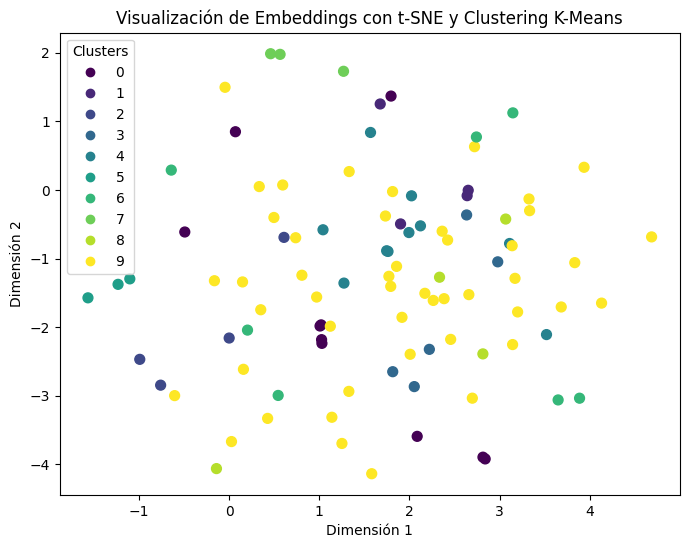

In [54]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Convertir los embeddings a numpy array
embeddings = np.array(list(df['Embedding']))

# Reducir a 2D con t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Ajustar KMeans sobre los embeddings originales y visualizar en 2D
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(embeddings)

# Graficar t-SNE con los clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='viridis', s=50)
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Visualización de Embeddings con t-SNE y Clustering K-Means')

# Añadir leyenda
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

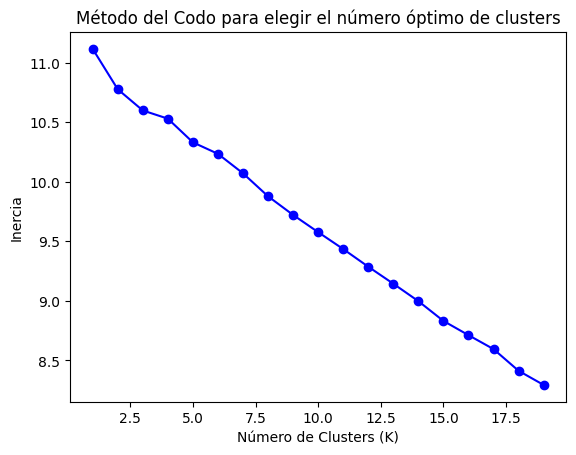

In [51]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
k_values = range(1,20)  # Probar diferentes valores de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(list(df['Embedding']))
    inertia.append(kmeans.inertia_)

# Graficar el Método del Codo
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para elegir el número óptimo de clusters')
plt.show()

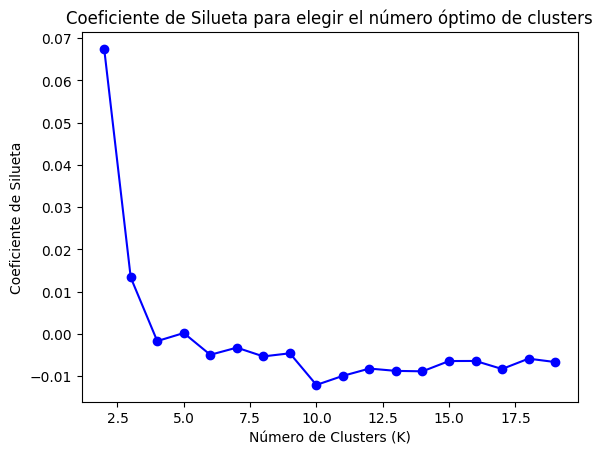

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

silhouette_scores = []
k_values = range(2, 20)  # Probar valores de k entre 2 y 19 (evitar k=1, ya que no tiene sentido en silueta)

# Convertir los embeddings a un formato numpy array
embeddings = np.array(list(df['Embedding']))

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(embeddings)
    
    # Calcular el coeficiente de silueta
    silhouette_avg = silhouette_score(embeddings, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar el Coeficiente de Silueta
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para elegir el número óptimo de clusters')
plt.show()


In [55]:
from sklearn.cluster import KMeans
import numpy as np

# Convertir los embeddings a un formato numpy array
embeddings = np.array(list(df['Embedding']))

# Definir el valor óptimo de K basado en el análisis del coeficiente de silueta
optimal_k = 10  # Cambia este valor según tu análisis

# Aplicar KMeans con el valor óptimo de k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# Añadir las etiquetas de los clusters al DataFrame
df['Cluster'] = cluster_labels

# Ver los primeros registros con su cluster asignado
print(df[['Song', 'Cluster']].head())


                            Song  Cluster
0              Belanova . Por Ti        1
1       Enrique Iglesias .Dímelo        9
2         Ricky Martín . Tal vez        9
3          Thalía . Regresa a mí        9
4  Fangoria . Miro la vida pasar        8


In [57]:
print(len(df[df['Cluster']==0]))
print(len(df[df['Cluster']==1]))
print(len(df[df['Cluster']==2]))
print(len(df[df['Cluster']==3]))
print(len(df[df['Cluster']==4]))

10
4
4
5
10


In [60]:
dfAgrupado = []

for i in range(10):
    dfAgrupado.append(df[df['Cluster']==i])
    
dfAgrupado[0].head()

,Song,Year,Letra,Normalize Letra,Embedding,Assigned_Topic,Cluster
20,Shakira . Día de Enero,2005,Te conocí un día de enero\nCon la Luna en mi n...,conocí día enero luna nariz vi sincero ojos pe...,"[0.028853338211774826, -0.01755119301378727, -...",Tópico 4,0
35,Yuridia . Angel,2005,Así es la ley\nHay un ángel\nHecho para mí\nTe...,así ley ángel hecho conocí tiempo tal llegó fa...,"[0.008509562350809574, 0.004914006683975458, -...",Tópico 2,0
38,Moderatto y Belinda . Muriendo Lento,2005,Aquí vamos\nYeah\nC'mon\nBelinda\nQuizá no sie...,aquí vamos yeah cmon belinda quizá sientas sen...,"[0.007863590493798256, 0.004837179556488991, -...",Tópico 8,0
44,Nelly Furtado . Manos al aire,2009,"Tú, que pierdes el contról\nHablando en alta v...",pierdes contról hablando alta voz hieres coraz...,"[-0.0005861148238182068, -0.00802284199744463,...",Tópico 1,0
45,Mónica Naranjo . Europa,2008,"Yo era la rosa dorada del Sol\nLluvia de vino,...",rosa dorada sol lluvia vino burbuja amor palac...,"[0.04930216446518898, -0.02268584631383419, -0...",Tópico 9,0


In [61]:
from wordcloud import WordCloud

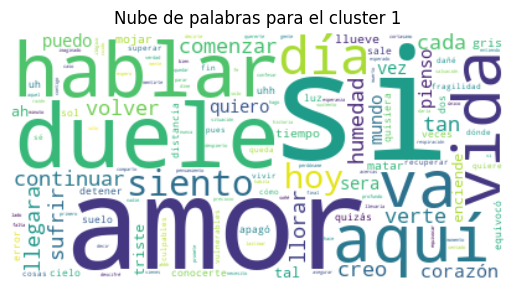

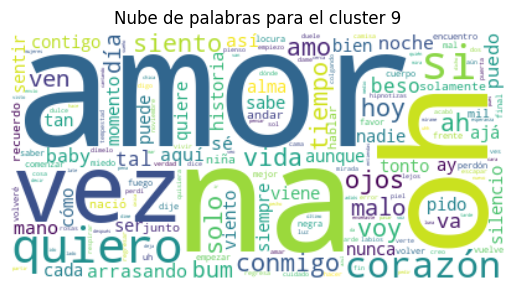

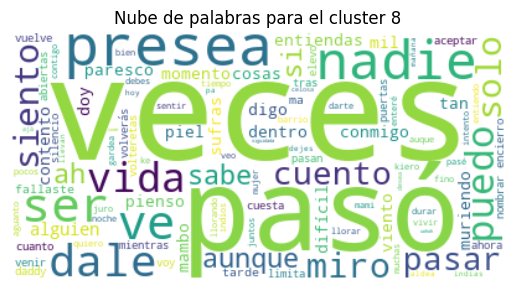

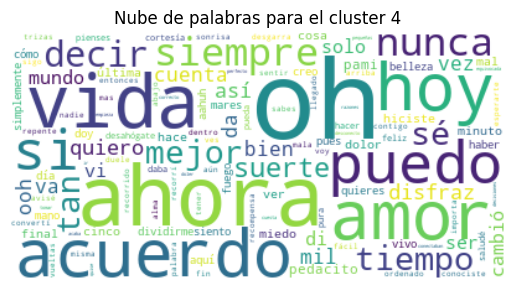

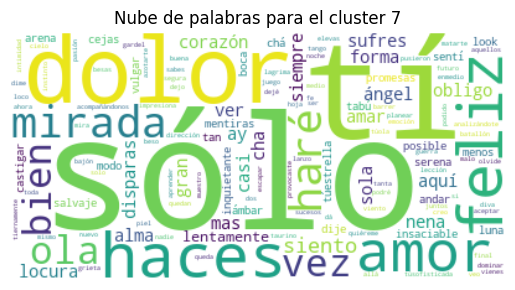

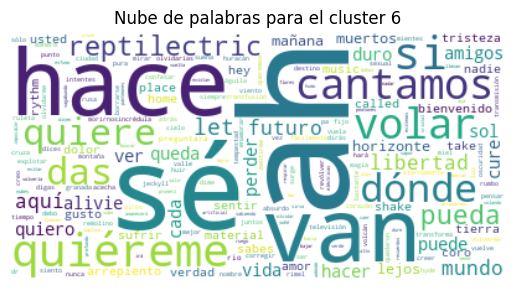

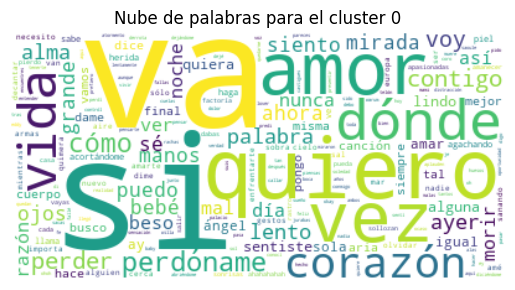

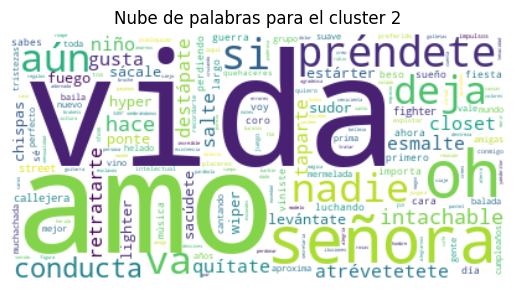

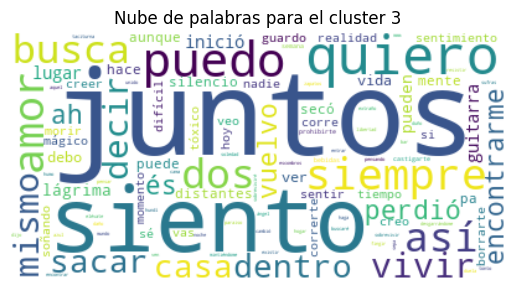

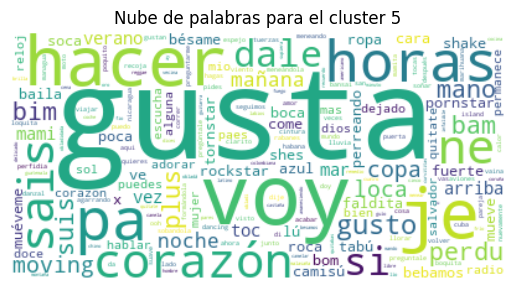

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear un diccionario donde la clave es el número del cluster y el valor son todos los textos de ese cluster
clusters_textos = {}
for texto, label in zip(df["Normalize Letra"].to_list(), df['Cluster'].to_list()):
    if label not in clusters_textos:
        clusters_textos[label] = []
    clusters_textos[label].append(texto)

# Generar una nube de palabras para cada cluster
for cluster, textos_cluster in clusters_textos.items():
    # Unir todos los textos de este cluster en un solo string
    cluster_text = ' '.join(textos_cluster)
    
    # Generar la nube de palabras
    word_cloud = WordCloud(collocations=False, background_color='white').generate(cluster_text)
    
    # Mostrar la nube de palabras
    plt.figure()
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.title(f'Nube de palabras para el cluster {cluster}')
    plt.axis("off")
    plt.show()


In [63]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Convertir los embeddings de las canciones y de los tópicos a numpy arrays
song_embeddings = np.array(list(df['Embedding']))
topic_embeddings = np.array(topic_embeddings)  # Asegúrate de que topic_embeddings esté definido

# Calcular la similitud coseno entre cada canción y cada tópico
similarity_matrix = cosine_similarity(song_embeddings, topic_embeddings)

# Crear una lista para almacenar los resultados
top_5_songs_per_topic = {}

# Para cada tópico, encontrar las 5 canciones más cercanas
for topic_idx in range(topic_embeddings.shape[0]):
    # Obtener las similitudes para este tópico
    topic_similarities = similarity_matrix[:, topic_idx]
    
    # Obtener los índices de las 5 canciones más cercanas, ordenando por similitud (descendente)
    top_5_indices = np.argsort(-topic_similarities)[:5]  # - para ordenar en forma descendente
    
    # Obtener los nombres de las canciones correspondientes
    top_5_songs = df.iloc[top_5_indices]['Song'].tolist()
    
    # Almacenar las 5 canciones más cercanas para este tópico
    top_5_songs_per_topic[f'Tópico {topic_idx}'] = top_5_songs

# Mostrar los resultados
for topic, songs in top_5_songs_per_topic.items():
    print(f"\n{topic}:")
    for i, song in enumerate(songs, 1):
        print(f"{i}. {song}")



Tópico 0:
1. Timbiriche . Vuelvo a comenzar
2. Alexander Acha . Te amo
3. Julieta Venegas . Eres para mí (feat. Ana Tijoux)
4. Kudai . Escapar
5. Anahí . Me hipnotizas

Tópico 1:
1. Timbiriche . Vuelvo a comenzar
2. Kudai . Escapar
3. Alexander Acha . Te amo
4. Alejandro Fernández . Te voy a perder
5. Manu Chao . Me gustas tu

Tópico 2:
1. Timbiriche . Vuelvo a comenzar
2. Alexander Acha . Te amo
3. Jeans . Entre azul y buenas noches
4. Thalía . Equivocada
5. La Quinta Estación . El sol no regresa

Tópico 3:
1. Kudai . Escapar
2. Timbiriche . Vuelvo a comenzar
3. Jeans . Entre azul y buenas noches
4. Julieta Venegas . Eres para mí (feat. Ana Tijoux)
5. Alexander Acha . Te amo

Tópico 4:
1. Timbiriche . Vuelvo a comenzar
2. Julieta Venegas . Eres para mí (feat. Ana Tijoux)
3. Jeans . Entre azul y buenas noches
4. Kudai . Escapar
5. Manu Chao . Me gustas tu

Tópico 5:
1. Kudai . Escapar
2. Timbiriche . Vuelvo a comenzar
3. Manu Chao . Me gustas tu
4. Jeans . Entre azul y buenas noches
5

In [64]:
# Ejemplo de lista de textos de sentimientos
sentimientos_textos = {
    "Amor": "Te amo más allá de cualquier límite. Eres el centro de mi universo, la razón por la que mi corazón late. Sin ti, la vida carece de sentido. Quiero estar a tu lado para siempre, cada segundo a tu lado es un regalo.",
    "Tristeza": "Siento un vacío inmenso que nada puede llenar. El dolor me consume, cada respiración es pesada. No hay luz en mi vida, solo sombras de recuerdos que me atormentan. Es como si nunca volviera a ser feliz.",
    "Alegría": "Mi corazón estalla de felicidad, no puedo contener la sonrisa. Todo es perfecto, la vida brilla con un resplandor único. Siento que puedo volar, que nada es imposible. Estoy en la cima del mundo, lleno de energía y esperanza",
    "Ira": "La furia arde dentro de mí como un fuego imparable. No puedo soportarlo más, cada segundo es una batalla contra mi propia rabia. Quiero gritar, romper todo a mi alrededor, liberar este volcán de enojo que me devora.",
    "Miedo": "El miedo me paraliza, me envuelve en una oscuridad sin escapatoria. Cada paso que doy está lleno de terror, siento que algo horrible va a pasar. No hay refugio, solo una sensación constante de peligro acechando en cada esquina.",
    "Nostalgia": "Los recuerdos me envuelven como una marea, arrastrándome a un tiempo donde todo era mejor. Quiero volver a esos días, donde la felicidad parecía eterna. Cada momento pasado se siente como una pérdida que no puedo recuperar.",
    "Soledad": "Estoy completamente solo, perdido en un océano de silencio. Nadie escucha, nadie entiende. La soledad me pesa como una carga que no puedo soltar. El mundo sigue, pero yo estoy atrapado en mi propia burbuja de aislamiento.",
    "Esperanza": "A pesar de todo, sigo creyendo. Hay una luz en la distancia que me guía, una promesa de que las cosas mejorarán. Cada día es una oportunidad nueva, una esperanza de que todo saldrá bien. No voy a rendirme.",
    "Desamor":"Me rompiste el corazón en mil pedazos. Todo lo que alguna vez tuvimos se ha desvanecido en la nada. El dolor es insoportable, es como si una parte de mí hubiera muerto. Ya no hay vuelta atrás, solo queda el vacío del desamor.",
    "Gratitud": "Gracias por todo lo que has hecho por mí. No hay palabras suficientes para expresar lo agradecido que estoy. Mi corazón se llena de gratitud, eres la razón por la que sigo adelante, y no sé cómo podré devolverte todo lo que me has dado."
}

# Convertir cada sentimiento en embeddings
sentimientos_embeddings = {sentimiento: toEmbbeding(texto) for sentimiento, texto in sentimientos_textos.items()}


In [68]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Asegurarse de que los embeddings de las canciones sean arrays de numpy
song_embeddings = np.array(df['Embedding'].tolist())

# Convertir los embeddings de sentimientos a un numpy array
sentimientos_embeddings_array = np.array(list(sentimientos_embeddings.values()))
sentimientos_labels = list(sentimientos_embeddings.keys())

# Verificar las dimensiones de las matrices
print(f"Dimensiones de los embeddings de canciones: {song_embeddings.shape}")
print(f"Dimensiones de los embeddings de sentimientos: {sentimientos_embeddings_array.shape}")

# Calcular la similitud coseno entre cada canción y cada sentimiento
similarity_matrix = cosine_similarity(song_embeddings, sentimientos_embeddings_array)

# Para cada canción, encontrar el sentimiento más cercano
closest_sentiments = [sentimientos_labels[np.argmax(sim)] for sim in similarity_matrix]

# Asignar los sentimientos más cercanos a las canciones en tu DataFrame
df['Sentimiento'] = closest_sentiments

# Ver los resultados
df[['Song', 'Sentimiento']].head()

Dimensiones de los embeddings de canciones: (97, 384)
Dimensiones de los embeddings de sentimientos: (10, 384)


,Song,Sentimiento
0,Belanova . Por Ti,Desamor
1,Enrique Iglesias .Dímelo,Desamor
2,Ricky Martín . Tal vez,Amor
3,Thalía . Regresa a mí,Desamor
4,Fangoria . Miro la vida pasar,Alegría


In [69]:
df.head()

,Song,Year,Letra,Normalize Letra,Embedding,Assigned_Topic,Cluster,Sentimiento
0,Belanova . Por Ti,2005,Yo se muy bien\nque a veces no suelo decir\nlo...,bien veces suelo decir corazón veces aquí quie...,"[0.035141170024871826, -0.037351347506046295, ...",Tópico 8,1,Desamor
1,Enrique Iglesias .Dímelo,2007,"Dímelo, por que estas fuera de mi\nY al mismo ...",dímelo mismo tiempo dentro dímelo hablar hazme...,"[0.008006702177226543, 0.0012117971200495958, ...",Tópico 9,9,Desamor
2,Ricky Martín . Tal vez,2003,"Tal vez, será, que esa historia ya tiene final...",tal vez historia final sé hoy siento tan dista...,"[0.02012873999774456, -0.029531951993703842, -...",Tópico 9,9,Amor
3,Thalía . Regresa a mí,2000,"Ah\nAh-ah\nAh-ah\nAh-ah-ah\nAh\nAh-ah-ah, ah-a...",ah ahah ahah ahahah ah ahahah ahah ahah ahahah...,"[0.02397005632519722, -0.015376350842416286, -...",Tópico 1,9,Desamor
4,Fangoria . Miro la vida pasar,2004,Mi indiferencia natural\nCurtida en mil batall...,indiferencia natural curtida mil batallas pere...,"[0.031276799738407135, -0.02261624112725258, -...",Tópico 9,8,Alegría
